# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import t
from scipy.stats import norm
from numpy.random import seed

medical = pd.read_csv('/Users/lindsaytruax/Desktop/SQL/Frequentist_Case_Study/insurance2.csv')
medical_copy = medical.copy()

In [31]:
medical.shape

(1338, 8)

In [33]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

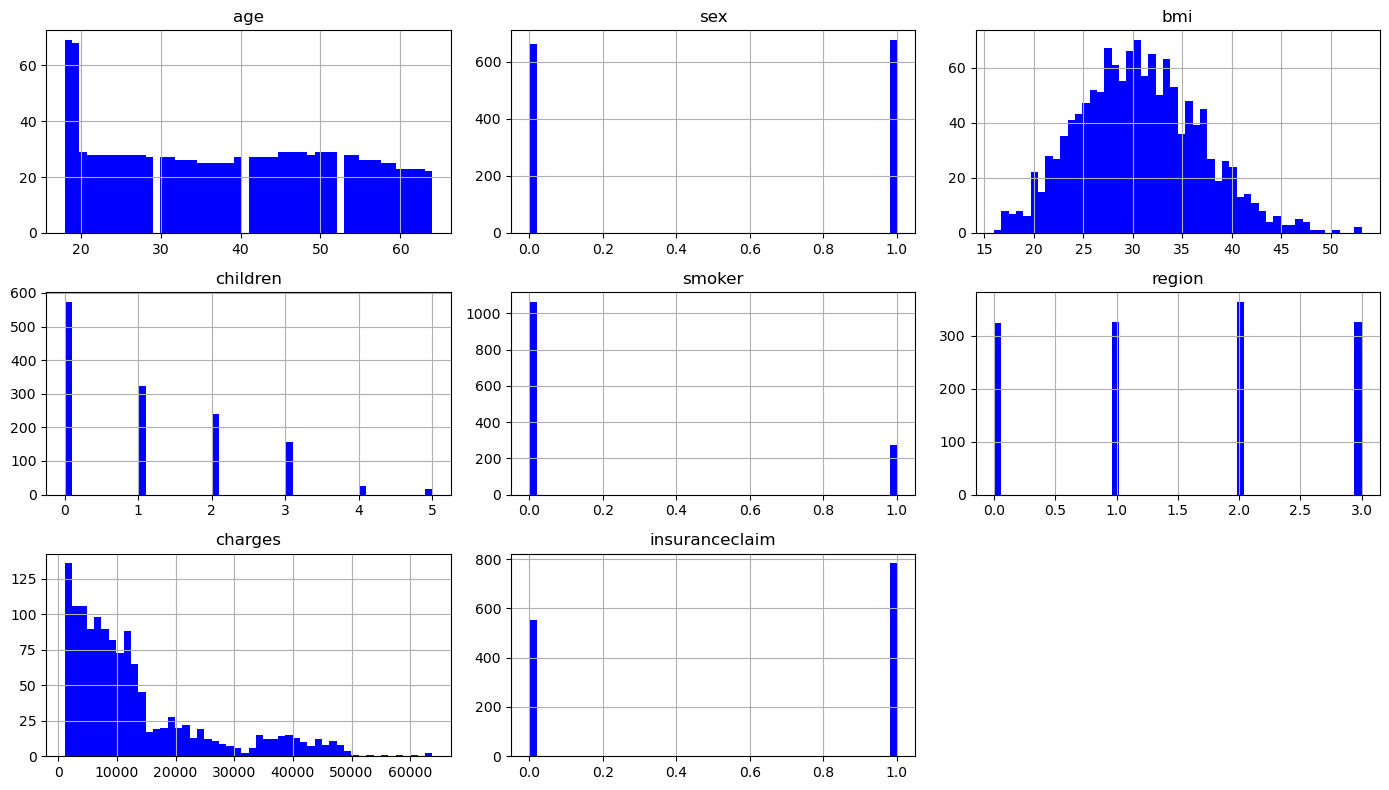

In [37]:
#only num from the DF
medical_data = medical_copy.select_dtypes(include='number')

medical_data.hist(figsize=(14, 8), bins=50, color='b')
plt.tight_layout()
plt.show()

In [38]:
mean_medical = np.mean(medical_copy)
print("This is the Mean of the Medical Data: ", mean_medical)

std_medical = np.std(medical_copy)
print("This is the Standard Deviation of the Medical Data:\n", std_medical)

#This shows the distribuation of how each patient lives their lives. We show a range of individuals who smoke, who is children, their 
#charges and insureance claims. The inquire if the data is appropriate is such a broad and vague request. 

#I checked the mean of data, std for each column and graphed to see how people are charged to how they live their life.


This is the Mean of the Medical Data:  1668.0248146262145
This is the Standard Deviation of the Medical Data:
 age                  14.044709
sex                   0.499973
bmi                   6.095908
children              1.205042
smoker                0.403543
region                1.104472
charges           12105.484976
insuranceclaim        0.492687
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ 

how would you justify that these data allow you to answer that question? The average show is 12105.48 and I would want to compare it to data that admin is comparing it too. Also, are these charges to the insurance or individual; and do they get charges monthly or yearly. I think there would need to be more analysis on what's the average charge for and if there are things not being charged. Also, what's the baseline of what Admin believes the hospital needs to maintain itself in the green. 

And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?
I think Comparing the charges to what individuals are being charged for. The extra step is to check the insurance claims and why.  

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ Per the Analysis of page 399 tht goes over one-sided or two-sided p-value. Since There is a broad amount of data (small and large), all that might affect the understanding of how cost might be affect. I would reccommend two-sided p-value.

In [45]:
numeric_columns = medical_copy.select_dtypes(include='number').columns


#attempted to streamline data
def analyze_column(medical_copy, confidence_level=0.95):
    mean_val = np.mean(medical_copy)
    std_val = np.std(medical_copy, ddof=1)
    n = len(medical_copy)
    sem = std_val / np.sqrt(n)

#t-critical amount
    t_critical = t.ppf((1+ confidence_level) / 2, n-1)

#margin of error
    Margin_error = t_critical * sem

#confidence interval
    confidence_interval = (mean_val - Margin_error, mean_val + Margin_error)

    return {
        "mean": mean_val,
        "std_dev": std_val,
        "confidence_interval": confidence_interval
    }

analysis_results = {}

for column in numeric_columns:
    analysis_results[column] = analyze_column(medical_copy[column])

for column, results in analysis_results.items():
    print(f"Column: {column}")
    print(f"Mean: {results['mean']}")
    print(f"Standard Deviation: {results['std_dev']}")
    print(f"95% Confidence Interval: {results['confidence_interval']}\n")

Column: age
Mean: 39.20702541106129
Standard Deviation: 14.049960379216172
95% Confidence Interval: (38.453516373452935, 39.96053444866964)

Column: sex
Mean: 0.5052316890881914
Standard Deviation: 0.5001595692843718
95% Confidence Interval: (0.47840778741658396, 0.5320555907597988)

Column: bmi
Mean: 30.66339686098655
Standard Deviation: 6.098186911679017
95% Confidence Interval: (30.336346903054107, 30.99044681891899)

Column: children
Mean: 1.0949177877429
Standard Deviation: 1.2054927397819095
95% Confidence Interval: (1.0302663830641632, 1.1595691924216367)

Column: smoker
Mean: 0.20478325859491778
Standard Deviation: 0.40369403754562083
95% Confidence Interval: (0.1831328697319564, 0.22643364745787917)

Column: region
Mean: 1.515695067264574
Standard Deviation: 1.1048849185826988
95% Confidence Interval: (1.4564393292269926, 1.5749508053021553)

Column: charges
Mean: 13270.422265141257
Standard Deviation: 12110.011236693996
95% Confidence Interval: (12620.954034192644, 13919.8904

In [47]:
#should admin be concerned.
Do I believe that Admin should be worried? 

The mean shows 13K and I would say Admin shouldn't be overly worried. Perhaps they should think of a way to bring in more profit if this
doesn't include what insurance is charged.


SyntaxError: invalid decimal literal (2448801247.py, line 4)

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ 
Null Hypothesis: detect no difference
Alternative Hypothesis: detect difference

Two sample T-test: the objective is to detect a difference in the means

we detected a difference were Admin believed that mean was 12k but was 13k. 

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [60]:
#preform t test
# Subset the data into two groups
# Subset the data into two groups using the correct column name for insurance status
from scipy import stats

insured = medical_copy[medical_copy['insuranceclaim'] == 1]['charges']
uninsured = medical_copy[medical_copy['insuranceclaim'] == 0]['charges']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(insured, uninsured)

# Print the t-statistic and p-value
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: there is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: no significant difference.")



T-statistic: 11.893299030876712
P-value: 4.461230231620717e-31
Reject the null hypothesis: there is a significant difference between the two groups.


In [62]:
#calculating Pooled STD
#number each group
n1 = len(insured)
n2 = len(uninsured)

# Calculate the standard deviations of both groups
std1 = np.std(insured, ddof=1)  # Sample std deviation
std2 = np.std(uninsured, ddof=1)

# Pooled standard deviation
pooled_std = np.sqrt(((n1 - 1) * std1 ** 2 + (n2 - 1) * std2 ** 2) / (n1 + n2 - 2))

print(f'Pooled Standard Deviation: ', pooled_std)

Pooled Standard Deviation:  11520.034268775256


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

In [ ]:
# while I see the function of using t test which it testing a smaller sample size. Whereas the use of Z test is that you're testing a 
#larger sample size and this creates a representation of a normal population which is large enough for CLT. 
# to do an equivalent sample test in Z I would do two sample test of Charges vs insurance claim to see how the cost affect those who don't
#have an insurance claim. Should people on average have insurance? 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test